# EDA & Preprocessing

## EDA

### Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams['font.family'] = 'NanumGothic'

### Function

In [2]:
# 데이터 검증 : data1과 data2에 있는 가수 정보가 서로 포함되어 있는지 확인
def check_artist(data1, data2):
    artist = list(data1['Artist'])
    for idx in artist:
        if idx not in set(data2['Artist']):
            print(idx)

def artist_num(data1, data2):
    if len(data1['Artist'].value_counts()) == len(data2['Artist'].value_counts()):
        print("가수 정보가 일치합니다")
    else:
        print("누락된 가수 정보를 검색합니다")
        check_artist(data1, data2)
        check_artist(data2, data1)

In [3]:
# 데이터 그룹 분포 시각화
def data_distribution(data, feature, count_num):
    
    if feature == 'Genre':
        new_rows = []
        for _, row in data.iterrows():
            genres = row[feature].split()
            for genre in genres:
                new_rows.append({feature: genre})

        data = pd.DataFrame(new_rows)
        
    counts = data[feature].value_counts()
    # 데이터를 개씩 끊어서 여러 그래프로 표현
    num_subplots = len(counts) // count_num + 1

    plt.figure(figsize=(14, 6*num_subplots))
    for i in range(num_subplots):
        start_idx = i * count_num
        end_idx = (i + 1) * count_num
        
        plt.subplot(num_subplots, 1, i + 1)
        sns.barplot(x=counts.index[start_idx:end_idx], y=counts.values[start_idx:end_idx])
        plt.xticks(rotation=45, horizontalalignment='right')

        plt.title("Data distribution (Graph {})".format(i + 1))
        plt.xlabel("Data")
        plt.ylabel("Count")

        plt.tight_layout()
        
    plt.show()

In [4]:
# 음계 변환 함수
def convert_flat_to_sharp(note):
    flats = {"Ab": "G#", "Bb": "A#", "Db": "C#", "Eb": "D#", "Gb" : "F#"}
    
    for flat, sharp in flats.items():
        note = note.replace(flat, sharp)
    
    return note

# 주파수 변환 함수
def convert_to_frequency(row, table):
    # "Low"와 "High" 열의 값을 음계와 옥타브로 분할
    low_note = ''.join(filter(str.isalpha, row['Low']))
    low_octave = int(''.join(filter(str.isdigit, row['Low'])))
    
    high_note = ''.join(filter(str.isalpha, row['High']))
    high_octave = int(''.join(filter(str.isdigit, row['High'])))
    
    low_note = convert_flat_to_sharp(low_note)
    high_note = convert_flat_to_sharp(high_note)

    # octave_table에서 노트에 해당하는 주파수 값을 찾아서 반환
    low_frequency = table[low_note][low_octave]
    high_frequency = table[high_note][high_octave]

    return low_frequency, high_frequency

### Load dataset

In [5]:
# 노래 정보(제목, 가수, 좋아요, 장르)
datafile = './data/dataset.csv'
column_names = ['Title', 'Artist', 'Rating', 'Genre']

# 음역대 정보(가수, 최저 음역대, 최고 음역대)
octavefile = './data/octave.csv'

# 음역대 별 주파수 정보
tablefile = './data/octave_table.csv'

In [6]:
# 데이터 불러오기 
df_singer = pd.read_csv(datafile, names=column_names)
df_octave = pd.read_csv(octavefile)
octave_table = pd.read_csv('./data/octave_table.csv')

In [7]:
# 데이터 중복 제거
df_singer = df_singer.sort_values(by='Rating', ascending=False)  # Rating을 기준으로 내림차순 정렬
df_singer = df_singer.drop_duplicates(subset=['Title', 'Artist'], keep='first')  # 중복 행 중 첫 번째 행 유지

### Data Visualization

#### Singer

In [9]:
# 가수 인원 확인
artist_num(df_singer, df_octave)

가수 정보가 일치합니다


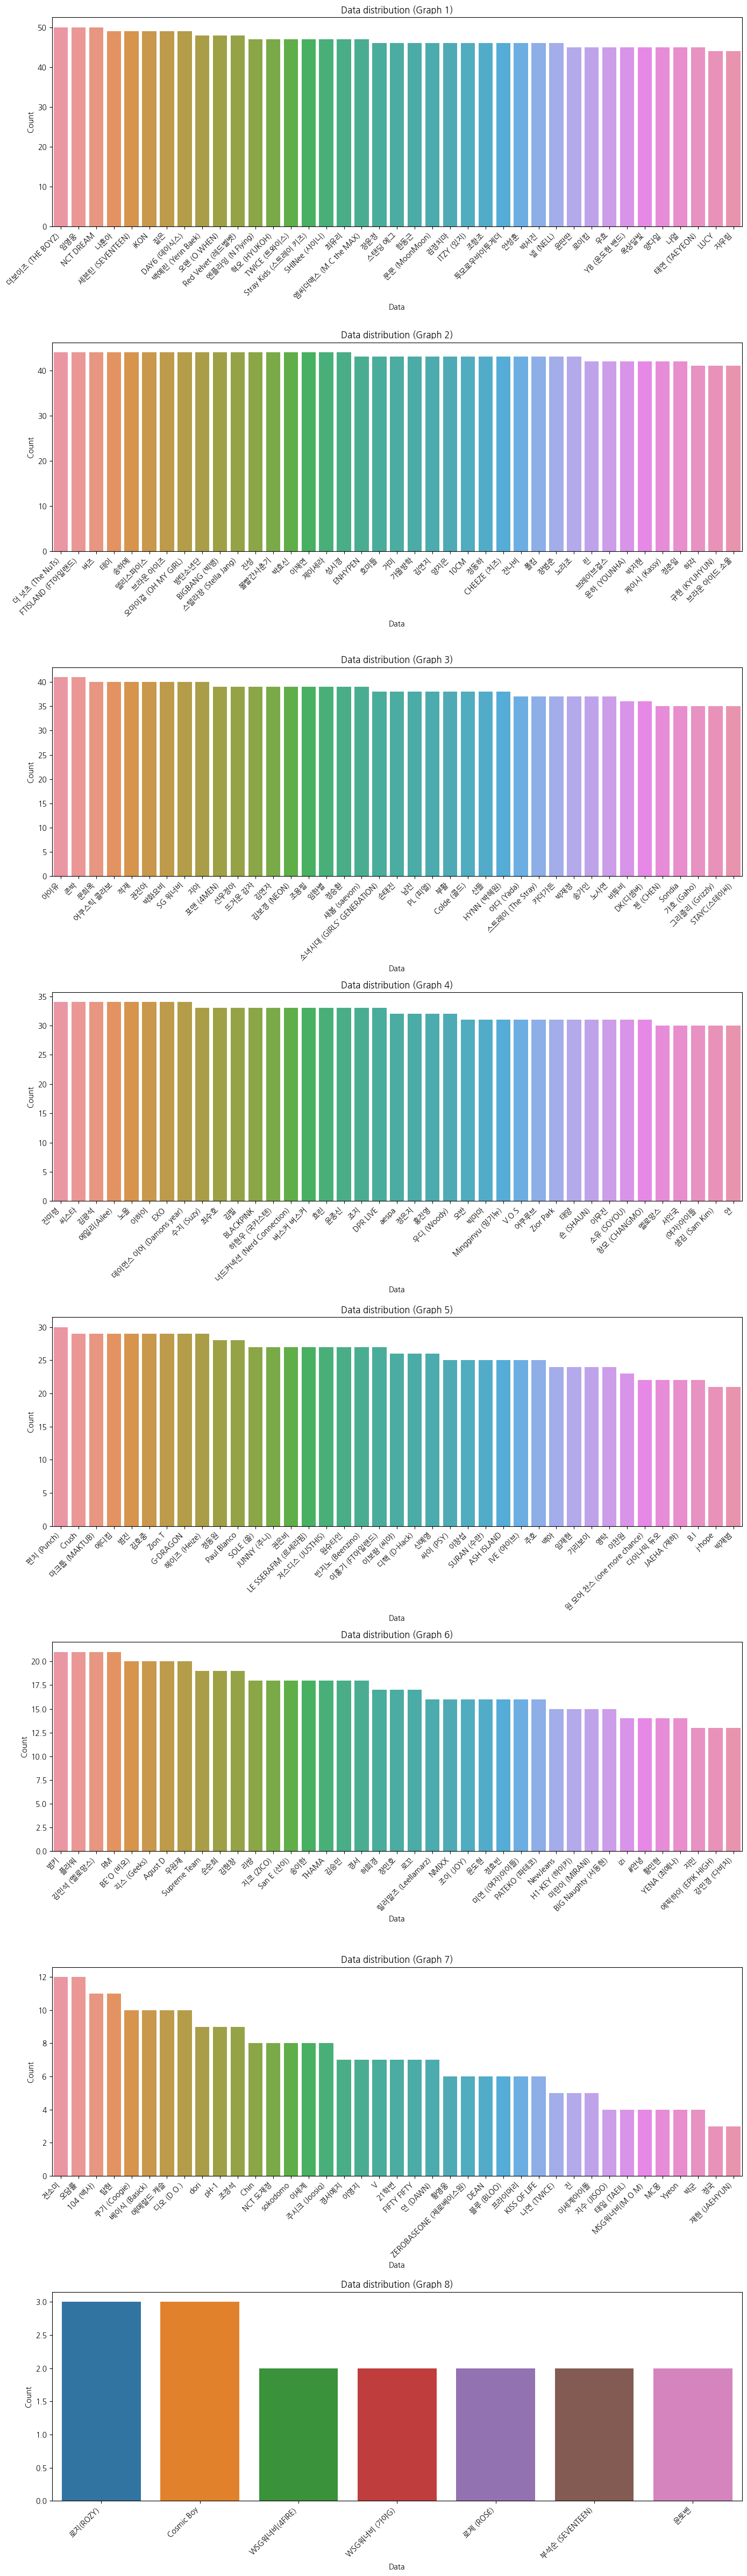

In [11]:
# 가수별 노래 개수 분포 
data_distribution(df_singer, 'Artist', 39)

In [12]:
# 인기 노래 정렬
df_singer.sort_values(by='Rating', ascending=False)[:10]

,Title,Artist,Rating,Genre
5518,봄날,방탄소년단,550574,랩/힙합
1634,밤편지,아이유,462165,발라드
5516,Dynamite,방탄소년단,458072,댄스
4918,모든 날 모든 순간 (Every day Every Moment),폴킴,427725,발라드 국내드라마
5560,주저하는 연인들을 위해,잔나비,394868,인디음악 록/메탈
5519,DNA,방탄소년단,374982,랩/힙합
4886,Way Back Home,숀 (SHAUN),363413,인디음악 일렉트로니카
486,좋니,윤종신,360033,발라드
1635,Blueming,아이유,356891,록/메탈
968,첫눈처럼 너에게 가겠다,에일리(Ailee),355527,발라드 국내드라마


#### Genres

In [9]:
# 선호도 고려를 위한 데이터프레임 생성
preference_list = ['Rating', 'Genre']
df_recommend = pd.DataFrame(df_singer[preference_list])
df_recommend

,Rating,Genre
5518,550574,랩/힙합
1634,462165,발라드
5516,458072,댄스
4918,427725,발라드 국내드라마
5560,394868,인디음악 록/메탈
...,...,...
8785,0,성인가요/트로트
7443,0,POP
8803,0,성인가요/트로트
7444,0,POP


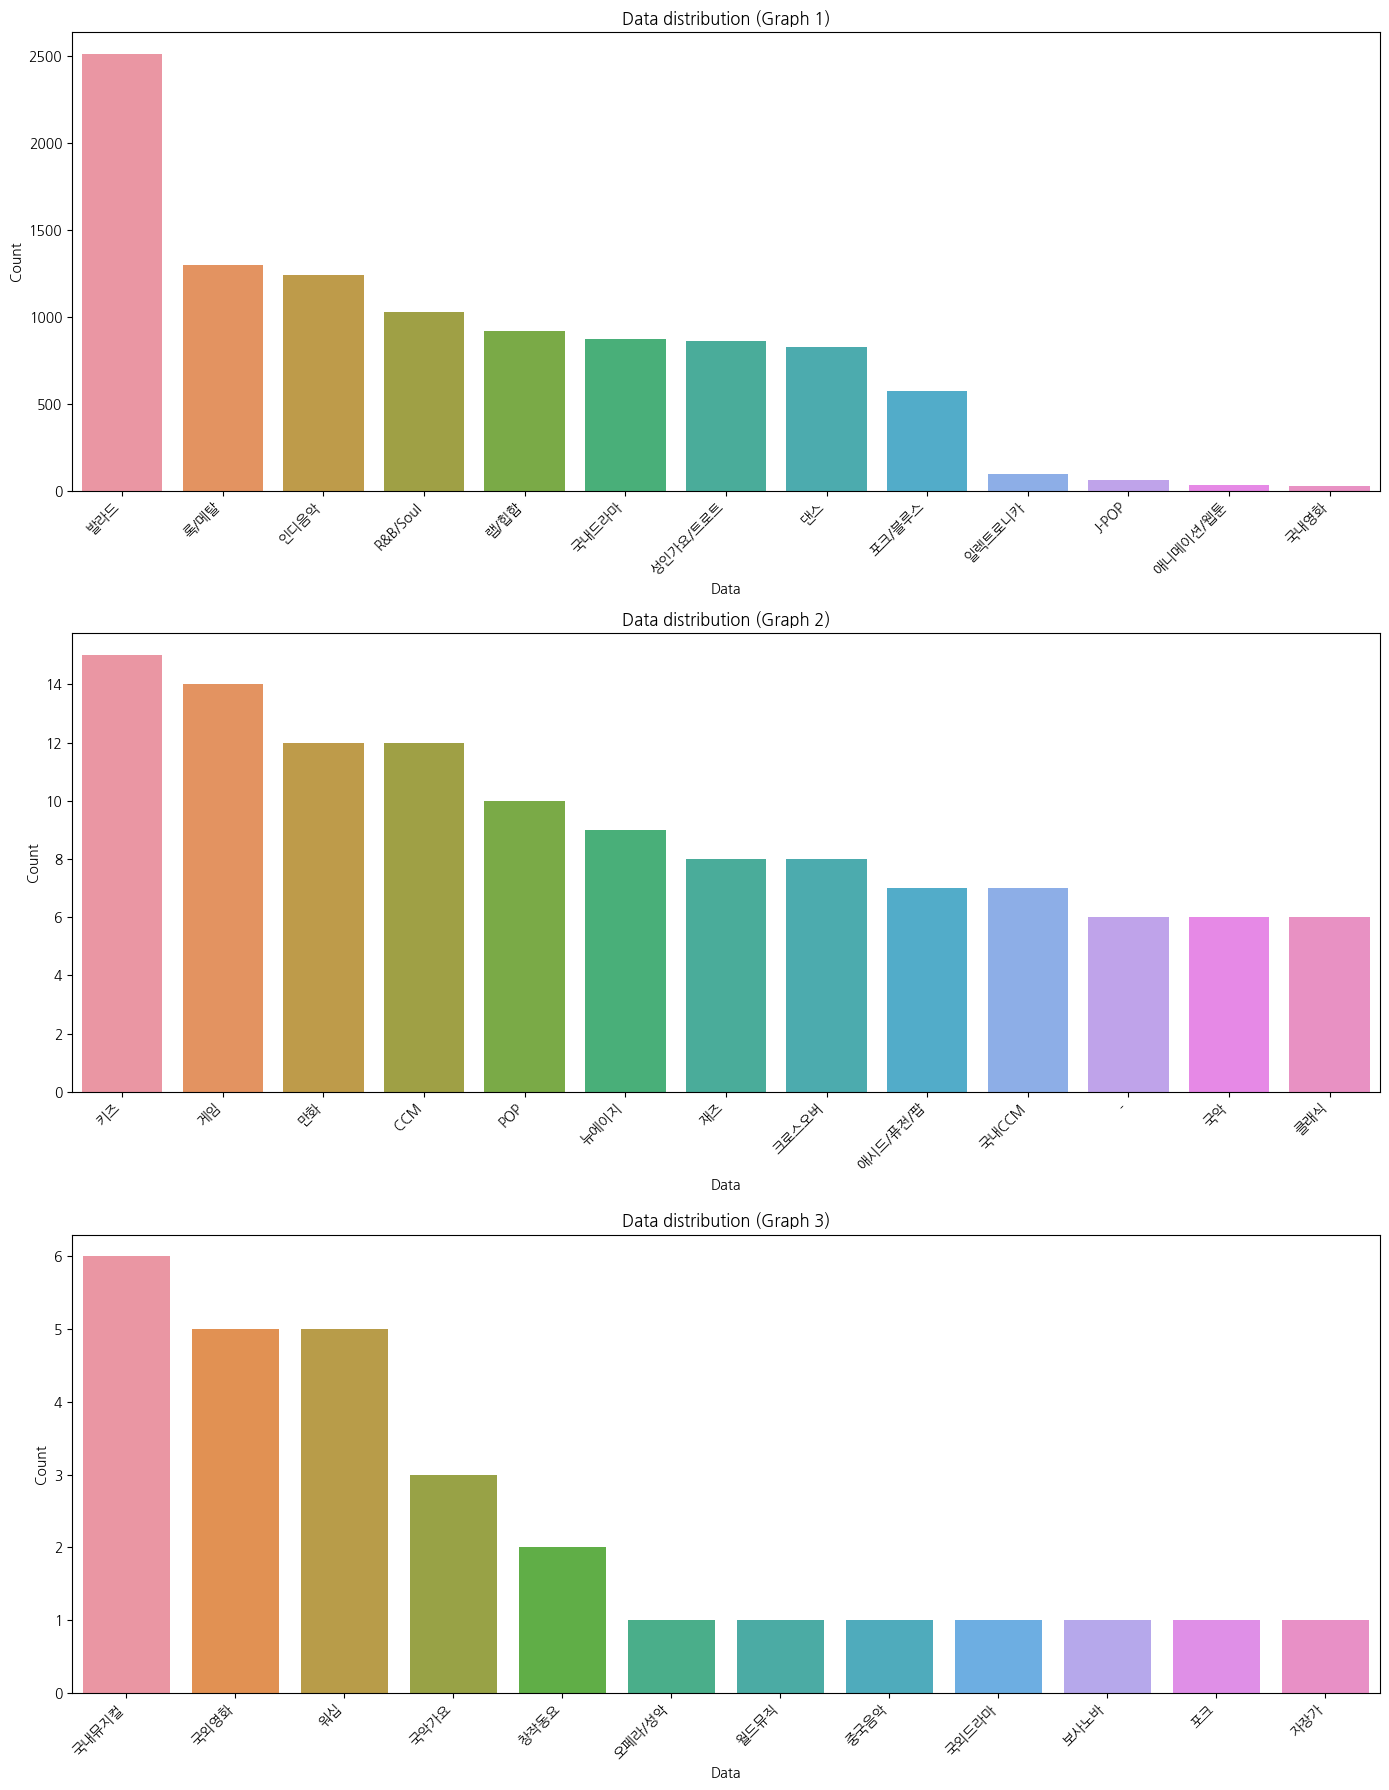

In [14]:
data_distribution(df_recommend, 'Genre', 13)

#### Octave

In [10]:
# 주파수 추가
df_octave['Frequency'] = df_octave.apply(convert_to_frequency, axis=1, args=(octave_table, ))
df_octave

,Artist,Low,High,Frequency
0,이창섭,B2,D5,"(124, 587)"
1,안성훈,G3,G5,"(196, 784)"
2,이세계,E2,E4,"(82, 330)"
3,김승민,C2,C4,"(65, 262)"
4,남진,F2,F4,"(87, 349)"
...,...,...,...,...
275,진성,F2,C#5,"(87, 523)"
276,전소미,F1,G4,"(44, 392)"
277,서인국,G2,G#4,"(98, 392)"
278,오마이걸 (OH MY GIRL),E3,F5,"(165, 699)"


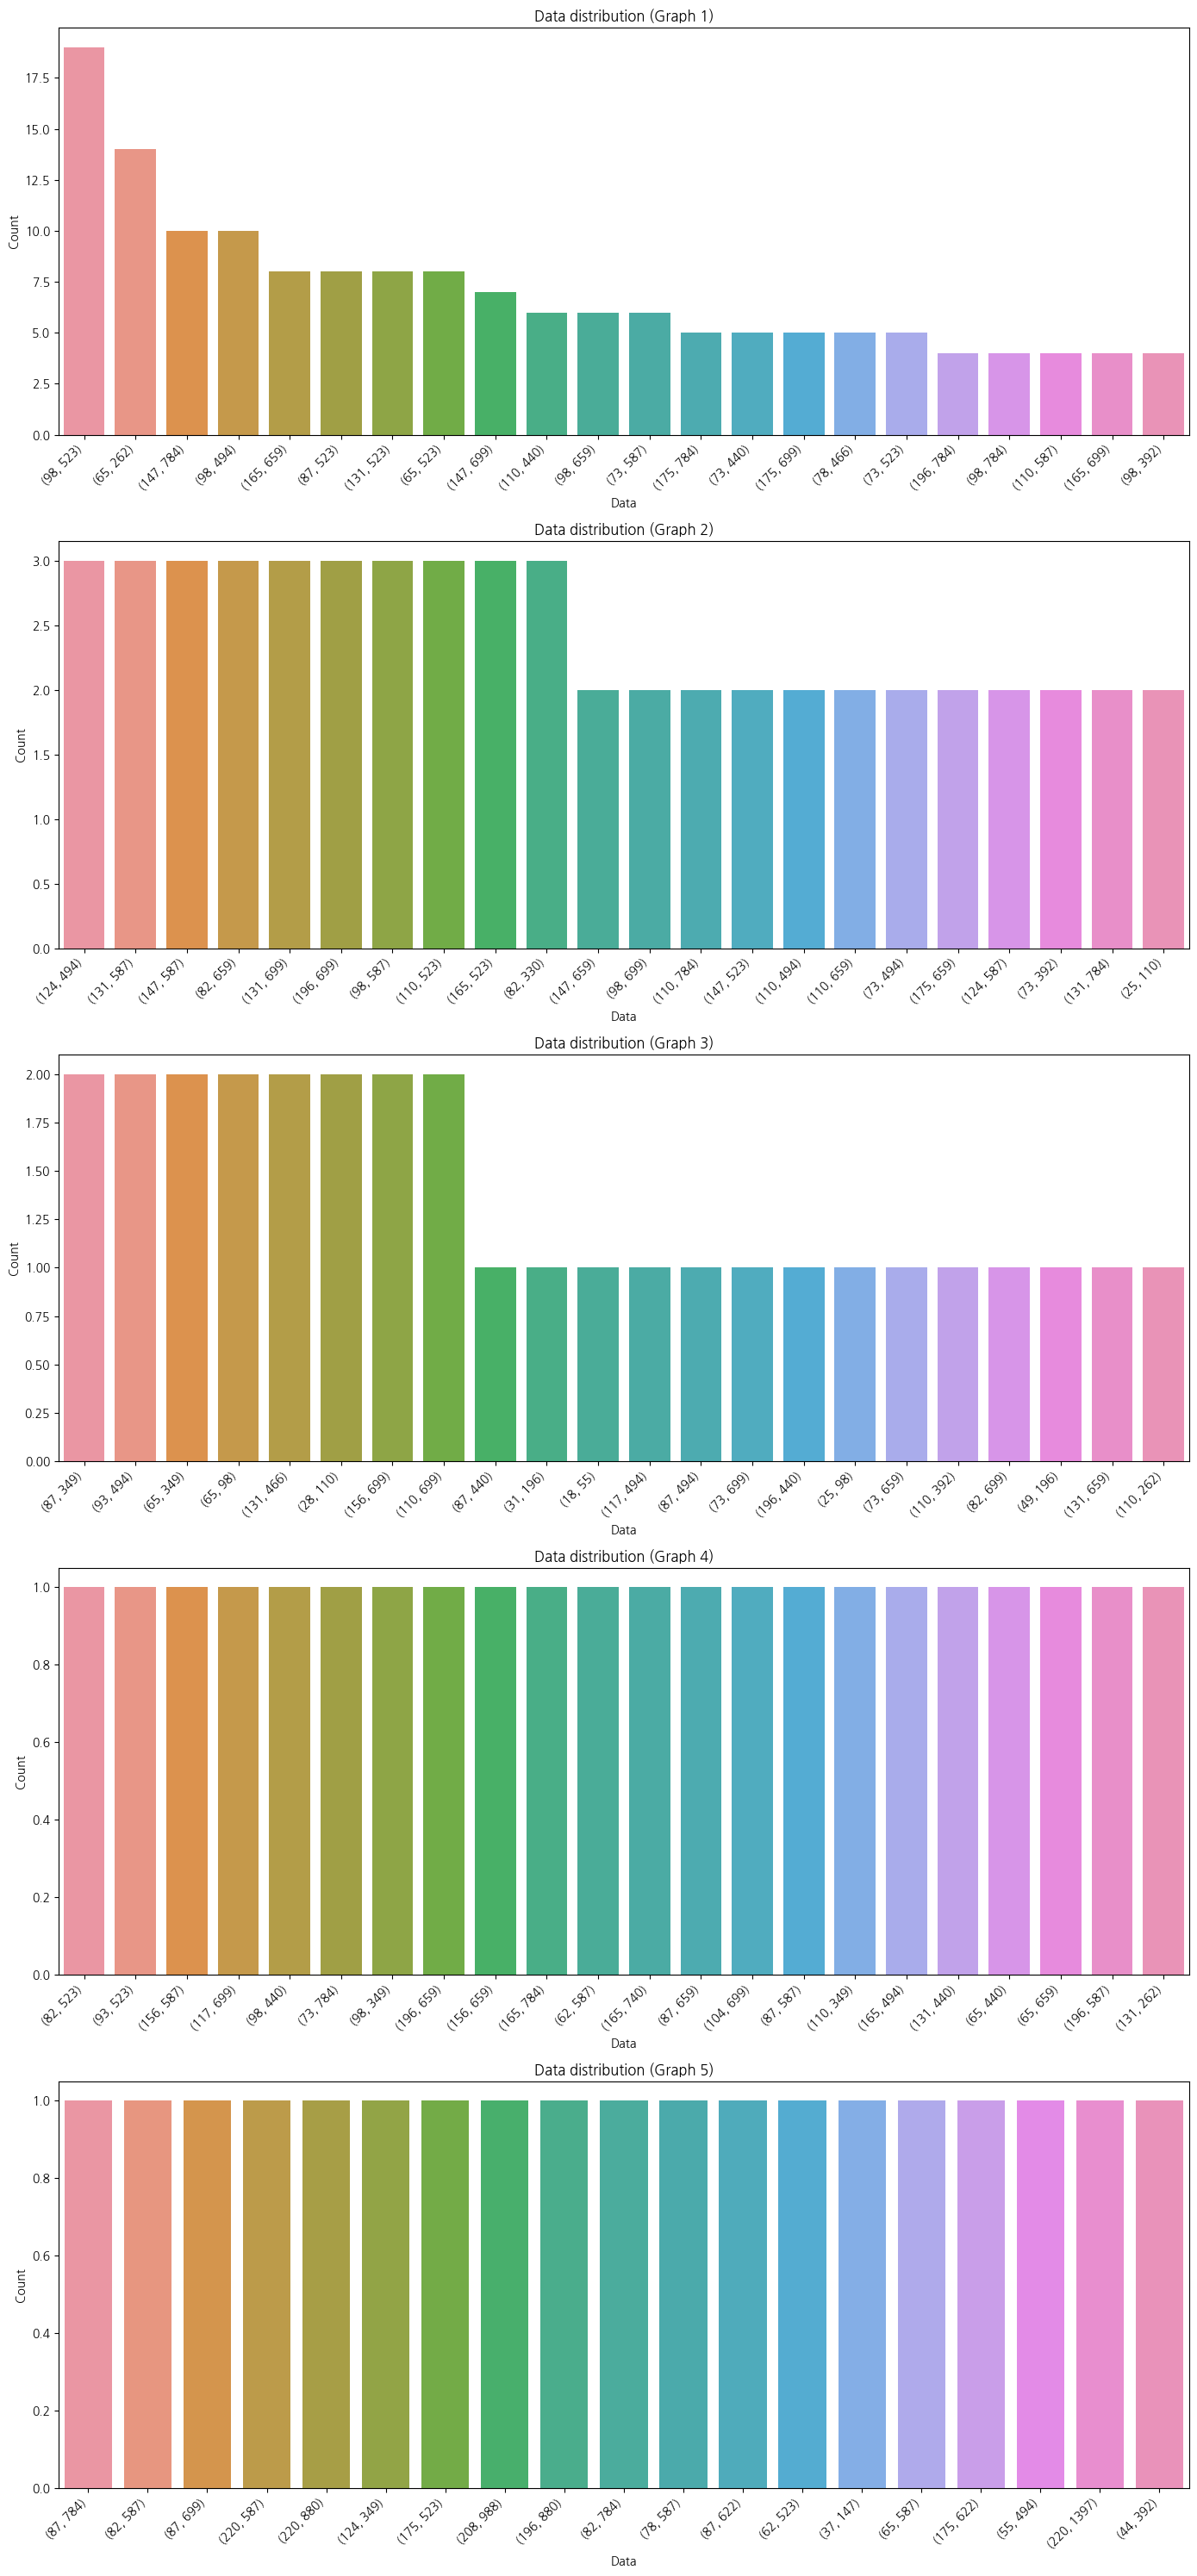

In [16]:
# 주파수 별 분포 확인
data_distribution(df_octave, 'Frequency', 22)

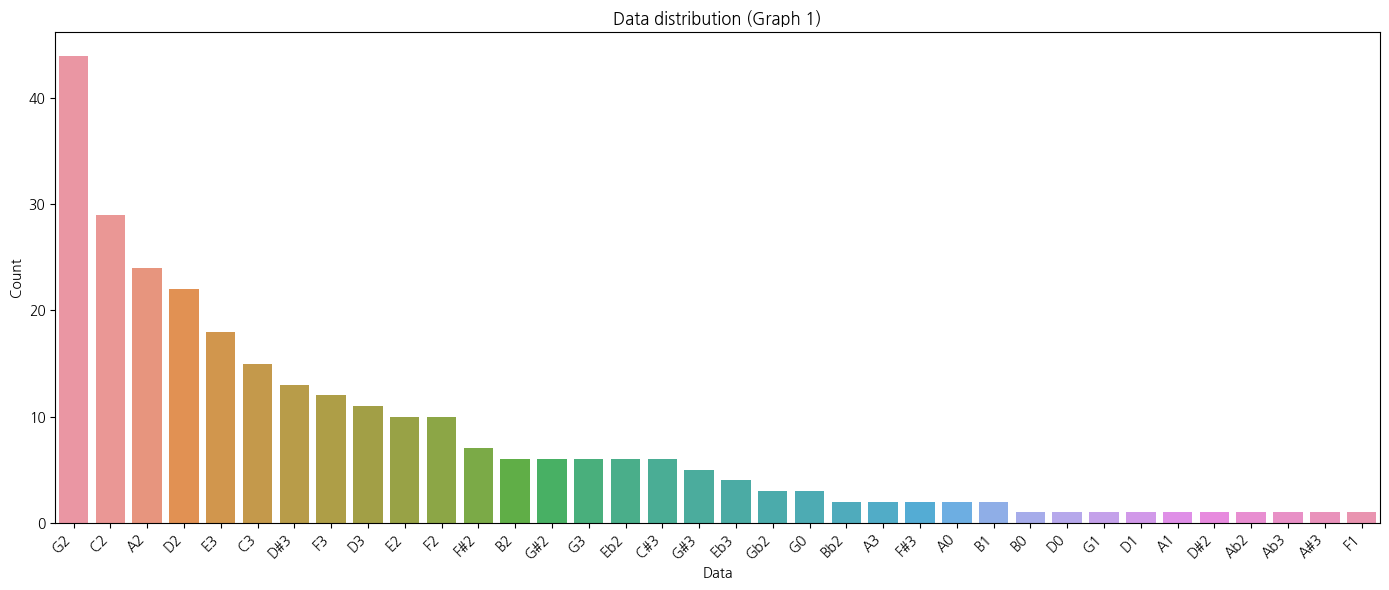

In [218]:
# 최저 음역대 분포 확인
data_distribution(df_octave, 'Low', 37)

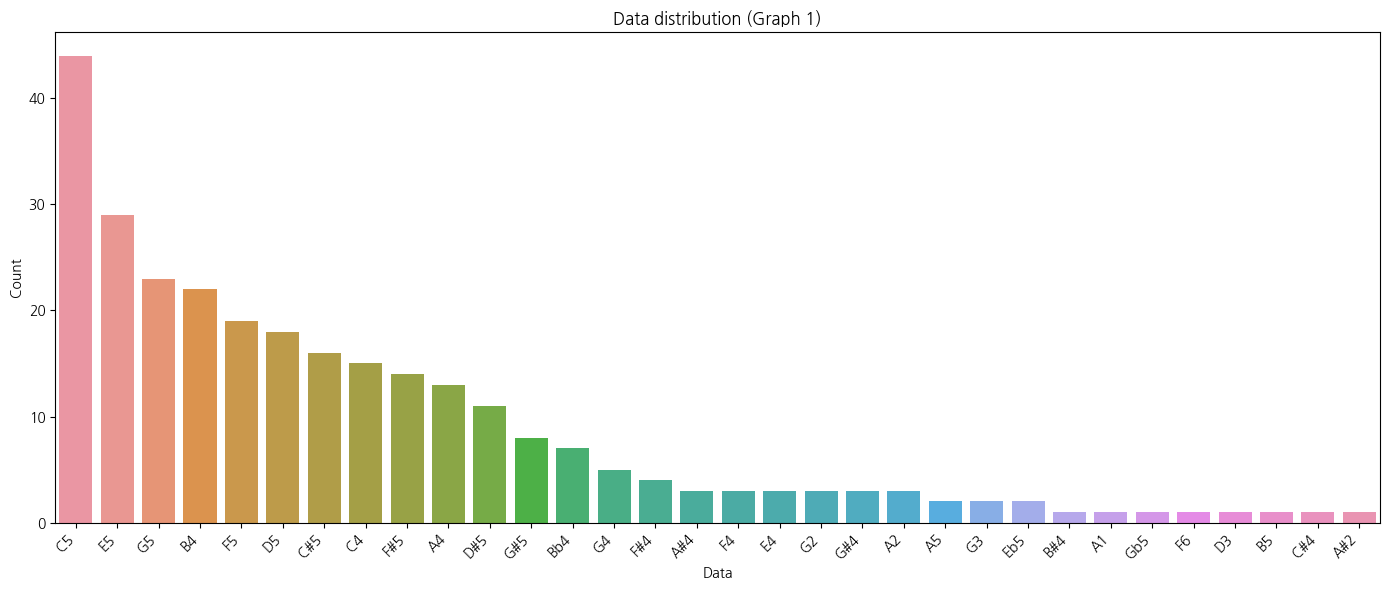

In [17]:
# 최고 음역대 분포 확인
data_distribution(df_octave, 'High', 33)

## Preprocessing

### Import package

In [18]:
import os
import subprocess
DATA_DIR = '/home/ckjwh/ckj/SongSSam/Remover/vocal-remover'

### Vocal Remover

In [19]:
def separate_audio(input_file, output_dir, gpu_id=0):
    # Build the command for separating audio
    command = [
        'python',
        '{DATA_DIR}/inference.py',
        '--input', input_file,
        '--tta',
        '--gpu', str(gpu_id),
        '--output_dir', output_dir
    ]

    # Run the command
    subprocess.run(command)

def separate_audio_in_folder(input_folder, output_dir, gpu_id=0):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # List all audio files in the input folder
    audio_files = [f for f in os.listdir(input_folder) if f.endswith('.mp3')]  # Replace with the actual audio file extension

    for audio_file in audio_files:
        input_path = os.path.join(input_folder, audio_file)
        output_path = os.path.join(output_dir, audio_file)

        # Call the separate_audio function for each file in the folder
        separate_audio(input_path, output_path, gpu_id)

In [20]:
# 파일 경로에 있는 mp3에서 보컬 및 MR 분리 
input_folder = '/home/ckjwh/ckj/SongSSam/Dataset/Song/Source1'  # Data folder path
output_folder = '/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess'  # Output folder path
gpu_id = 0  

# separate_audio_in_folder(input_folder, output_folder, gpu_id)

## Recommend System

In [5]:
# # 데이터프레임에서 장르를 분할하여 복제하는 함수
# def expand_genres(dataframe):
#     expanded_data = []
#     for index, row in dataframe.iterrows():
#         genres = row['Genre'].split()  # 띄어쓰기로 구분된 장르를 분할
#         for genre in genres:
#             expanded_row = row.copy()
#             expanded_row['Genre'] = genre
#             expanded_data.append(expanded_row)
#     expanded_df = pd.DataFrame(expanded_data)
#     return expanded_df

# # 장르를 분할하여 데이터 확장
# df_singer = expand_genres(df_singer)

In [8]:
# 고유한 장르 값 추출
unique_genres = df_singer['Genre'].str.split().explode().unique()

In [9]:
# 장르를 고유한 ID로 매핑
genre_to_id = {genre: idx for idx, genre in enumerate(unique_genres)}

In [10]:
genre_to_id

{'랩/힙합': 0,
 '발라드': 1,
 '댄스': 2,
 '국내드라마': 3,
 '인디음악': 4,
 '록/메탈': 5,
 '일렉트로니카': 6,
 '포크/블루스': 7,
 'R&B/Soul': 8,
 '성인가요/트로트': 9,
 '국내영화': 10,
 '애니메이션/웹툰': 11,
 '키즈': 12,
 '만화': 13,
 'J-POP': 14,
 '재즈': 15,
 '애시드/퓨전/팝': 16,
 'POP': 17,
 '국외영화': 18,
 '클래식': 19,
 '오페라/성악': 20,
 '크로스오버': 21,
 '게임': 22,
 '창작동요': 23,
 '국내뮤지컬': 24,
 '-': 25,
 'CCM': 26,
 '국내CCM': 27,
 '국악': 28,
 '국악가요': 29,
 '뉴에이지': 30,
 '월드뮤직': 31,
 '중국음악': 32,
 '국외드라마': 33,
 '보사노바': 34,
 '포크': 35,
 '자장가': 36,
 '워십': 37}

In [13]:
# JSON 파일로 저장
import json

with open('genre.json', 'w') as json_file:
    json.dump(genre_to_id, json_file)

In [11]:
df_singer['Genre_ID'] = df_singer['Genre'].str.split().apply(lambda x: ' '.join(str(genre_to_id[genre]) for genre in x))

In [189]:
df_singer

,Title,Artist,Rating,Genre,Genre_ID,Artist_ID,Title_ID,Log_Rating,Rating_Distribution
5518,봄날,방탄소년단,550574,랩/힙합,0,135,4607,13.218718,1.000000
1634,밤편지,아이유,462165,발라드,1,175,4490,13.043679,0.986758
5516,Dynamite,방탄소년단,458072,댄스,2,135,620,13.034784,0.986085
4918,모든 날 모든 순간 (Every day Every Moment),폴킴,427725,발라드 국내드라마,1 3,266,4224,12.966238,0.980900
5560,주저하는 연인들을 위해,잔나비,394868,인디음악 록/메탈,4 5,219,6613,12.886309,0.974853
...,...,...,...,...,...,...,...,...,...
8785,여름밤의 추억(One Summer Night),이채연,0,성인가요/트로트,9,212,5781,0.000000,0.000000
7443,Just In Love (Joe Jonas Remake),Supreme Team,0,POP,17,55,1085,0.000000,0.000000
8803,간다더니,이채연,0,성인가요/트로트,9,212,2433,0.000000,0.000000
7444,It Girl (Jason Derulo Remake),Supreme Team,0,POP,17,55,1061,0.000000,0.000000


In [13]:
df_singer['Artist'] = df_singer['Artist'].astype('category')
df_octave['Artist'] = df_octave['Artist'].astype('category')

df_singer['Title'] = df_singer['Title'].astype('category')
# 장르를 범주형 데이터의 코드로 변환
df_singer['Artist_ID'] = df_singer['Artist'].cat.codes
df_octave['Artist_ID'] = df_octave['Artist'].cat.codes
df_singer['Title_ID'] = df_singer['Title'].cat.codes

In [205]:
import os

# 현재 디렉토리 내의 파일 목록 가져오기 (상대 경로 사용)
for root, dirs, files in os.walk("."):
    for index, file_name in enumerate(files):
        if "wav" in file_name:
            new_name = "Vocals.wav"
            # 파일 경로를 포함하여 이름 변경
            os.rename(os.path.join(root, file_name), os.path.join(root, new_name))


In [14]:
df_singer['Log_Rating'] = np.log1p(df_singer['Rating'])

max_rating = np.max(df_singer['Log_Rating'])
min_rating = np.min(df_singer['Log_Rating'])

df_singer['Rating_Distribution'] = (df_singer['Log_Rating'] - min_rating) / (max_rating - min_rating)

In [15]:
Encoding_Singer = df_singer[['Title_ID', 'Artist_ID', 'Genre_ID', 'Rating_Distribution']]

In [16]:
Encoding_Singer

,Title_ID,Artist_ID,Genre_ID,Rating_Distribution
5518,4607,135,0,1.000000
1634,4490,175,1,0.986758
5516,620,135,2,0.986085
4918,4224,266,1 3,0.980900
5560,6613,219,4 5,0.974853
...,...,...,...,...
8785,5781,212,9,0.000000
7443,1085,55,17,0.000000
8803,2433,212,9,0.000000
7444,1061,55,17,0.000000


In [17]:
df_octave[['Low_Frequency', 'High_Frequency']] = pd.DataFrame(df_octave.apply(lambda row: convert_to_frequency(row, octave_table), axis=1).to_list(), columns=['Low_Frequency', 'High_Frequency'])
Encoding_Octave = df_octave[['Artist_ID', 'Low_Frequency', 'High_Frequency']]

In [18]:
# 두 데이터프레임을 'Artist' 열을 기준으로 concat
recommend = pd.merge(Encoding_Singer, Encoding_Octave, on='Artist_ID', how='outer')
recommend

,Title_ID,Artist_ID,Genre_ID,Rating_Distribution,Low_Frequency,High_Frequency
0,4607,135,0,1.000000,131,699
1,620,135,2,0.986085,131,699
2,526,135,0,0.970944,131,699
3,660,135,0,0.963163,131,699
4,1006,135,0,0.959037,131,699
...,...,...,...,...,...,...
8207,6324,253,9,0.310989,65,523
8208,3268,253,24,0.226628,65,523
8209,5587,253,9,0.121754,65,523
8210,6337,203,1 4,0.471487,104,699


In [20]:
# def recommend_songs(user_genre, user_low, user_high, dataframe):
#     # 사용자 입력 데이터와 데이터프레임의 데이터를 결합
#     user_data = {'Genre_Code': [dataframe['Genre_Code'].cat.categories.get_loc(user_genre)],
#                  'Low': [(user_low)],
#                  'High': [user_high]}

#     user_df = pd.DataFrame(user_data)

#     # 데이터프레임에 사용자 데이터 추가
#     extended_df = pd.concat([dataframe, user_df], ignore_index=True)

#     # 장르와 음역대에 대한 유사도 계산
#     similarity_matrix = cosine_similarity(extended_df[['Genre_Code', 'Frequency']])

#     # 사용자 데이터에 대한 유사도 정보 추출
#     user_similarity = similarity_matrix[-1]

#     # 유사도를 기반으로 추천
#     recommended_songs = dataframe.iloc[user_similarity.argsort()[:-1]]  # 가장 유사한 것을 제외하고 추천

#     return recommended_songs


In [19]:
from scipy.stats import norm

def visual(df, feature):
    # Rating 열의 데이터를 히스토그램으로 시각화
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20, density=True, alpha=0.6, color='b', label='Rating Distribution')

    # 평균과 표준편차 계산
    mean_rating = np.mean(df[feature])
    std_deviation = np.std(df[feature])

    # 정규분포를 그리기 위한 x 범위 생성
    x = np.linspace(mean_rating - 3*std_deviation, mean_rating + 3*std_deviation, 100)
    # 정규분포 그리기
    plt.plot(x, norm.pdf(x, mean_rating, std_deviation), 'r', label='Normal Distribution')

    plt.title('Rating Data Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

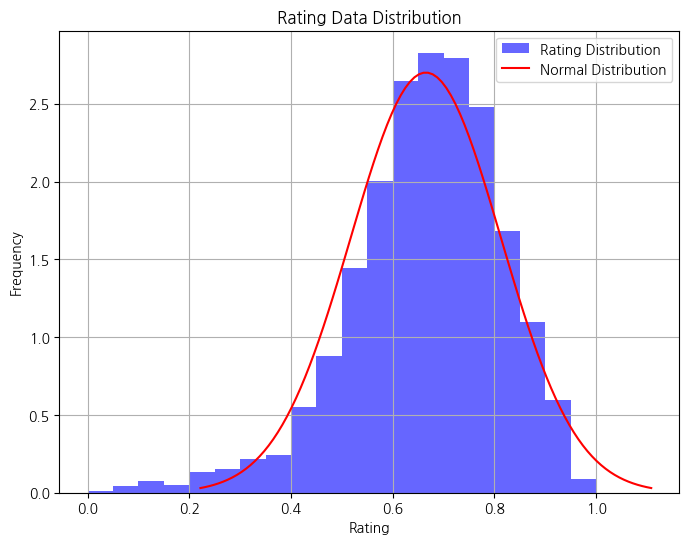

In [20]:
visual(recommend, "Rating_Distribution")

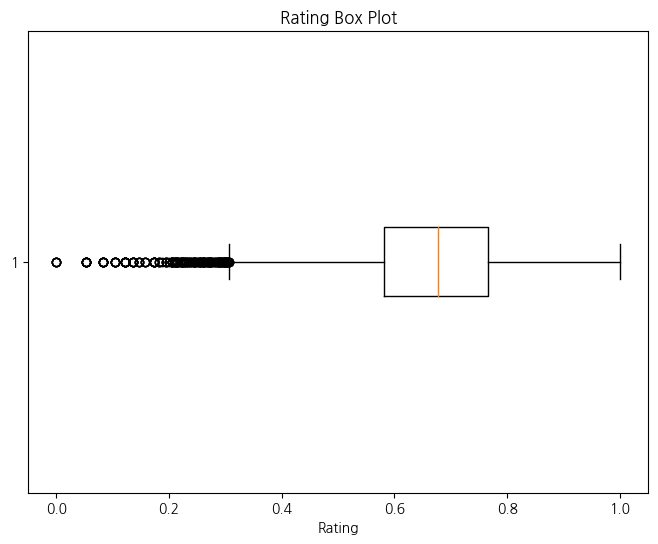

In [21]:
# Rating 열에 대한 박스 플롯 시각화
plt.figure(figsize=(8, 6))
plt.boxplot(recommend['Rating_Distribution'], vert=False)
plt.title('Rating Box Plot')
plt.xlabel('Rating')
plt.show()

In [24]:
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 오디오 파일 로드
audio_file = "/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess/1_그라데이션_10CM.mp3/1_그라데이션_10CM_Vocals.wav"
y, sr = librosa.load(audio_file)

# MFCC 계산
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

# 시간대 별 평균 MFCC 계산 (예: 1초 간격)
frame_duration = 0.1  # 초 단위
frames = librosa.times_like(mfccs)
frame_indices = np.arange(0, frames[-1], frame_duration)
mean_mfccs = []
for index in frame_indices:
    start = np.argmax(frames >= index)
    end = np.argmax(frames >= index + frame_duration)
    mean_mfcc = np.mean(mfccs[:, start:end], axis=1)
    mean_mfccs.append(mean_mfcc)




/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [25]:
# 평균 MFCC 데이터를 DataFrame으로 변환
df = pd.DataFrame(mean_mfccs, columns=[f"MFCC_{i}" for i in range(1, 21)])

df = df.dropna()

# 표준화 (평균을 0, 표준편차를 1로 스케일링)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [26]:
df

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20
0,-492.33551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-492.33551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-492.33551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-492.33551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-492.33551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,-492.33551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,-492.33551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,-492.33551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,-492.33551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
def extract_mfcc(filepath):
    # MFCC 계산
    y, sr = librosa.load(filepath, sr=None)  # sr=None으로 설정하여 원본 샘플링 속도로 읽음
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # MFCC 계산 (20개의 계수)
    feature = []

    # 각 MFCC 계수의 평균 계산
    mfcc_mean = np.mean(mfcc, axis=1)
    

    # 음역대 특성 추출
    # 각 음역대에 해당하는 MFCC 계수 범위를 선택하여 평균 계산
    very_low_range_feature = np.mean(mfcc_mean[:4])  # 매우 낮은 주파수 대역 (예: 처음 4개 계수의 평균)
    low_range_feature = np.mean(mfcc_mean[4:8])  # 낮은 주파수 대역 (예: 5~8번째 계수의 평균)
    mid_range_feature = np.mean(mfcc_mean[8:12])  # 중간 주파수 대역 (예: 9~12번째 계수의 평균)
    high_range_feature = np.mean(mfcc_mean[12:16])  # 높은 주파수 대역 (예: 13~16번째 계수의 평균)
    very_high_range_feature = np.mean(mfcc_mean[16:])  # 매우 높은 주파수 대역 (예: 17번째 이후 계수의 평균)
    
    feature.append([very_low_range_feature, low_range_feature, mid_range_feature, high_range_feature, very_high_range_feature])

    # 음역대 특성 출력
    print("매우 낮은 주파수 대역 특성:", very_low_range_feature)
    print("낮은 주파수 대역 특성:", low_range_feature)
    print("중간 주파수 대역 특성:", mid_range_feature)
    print("높은 주파수 대역 특성:", high_range_feature)
    print("매우 높은 주파수 대역 특성:", very_high_range_feature)
    
    
    return feature, mfcc_mean

## Result  

In [22]:
# 오디오 파일 로드
audio_file1 = "/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess/1_그라데이션_10CM.mp3/1_그라데이션_10CM_Vocals.wav"

audio_file2 = "/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess/15_폰서트_10CM.mp3/15_폰서트_10CM_Vocals.wav"

audio_file3 = "/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess/185_안아줘_정준일.mp3/185_안아줘_정준일_Vocals.wav"

audio_file4 = "/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess/171_여행_볼빨간사춘기.mp3/171_여행_볼빨간사춘기_Vocals.wav"

audio_file5 = "/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess/98_TOMBOY_(여자)아이들.mp3/98_TOMBOY_(여자)아이들_Vocals.wav"

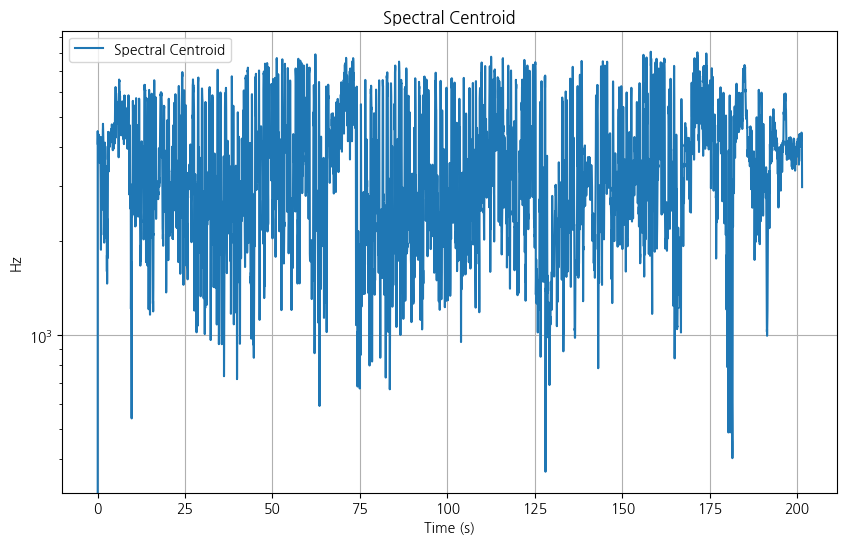

In [44]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 오디오를 로드하고 샘플 레이트를 가져옵니다.
audio, sr = librosa.load(audio_file1)

# 스펙트럼 센트로이드를 추출합니다.
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)

# 시간 값 (x축) 생성
times = librosa.times_like(spectral_centroids)

# 스펙트럼 센트로이드 시각화
plt.figure(figsize=(10, 6))
plt.semilogy(times, spectral_centroids[0], label='Spectral Centroid')
plt.ylabel('Hz')
plt.xlabel('Time (s)')
plt.legend()
plt.title('Spectral Centroid')
plt.grid()
plt.show()


In [169]:
def vocal_pitch(filepath):
    
    data = pd.read_csv(filepath)
    
    filtered = data[data['confidence'] >= 0.96]
    filtered.reset_index(inplace=True)
    
    time = filtered['time']
    frequency = filtered['frequency']

    # 필터링된 주파수에서 최저 주파수와 최대 주파수 추출
    if list(frequency.values):
        min_frequency = min(frequency)
        max_frequency = max(frequency)
        print("confidence >= 0.96인 주파수 중에서 최저 주파수:", min_frequency)
        print("confidence >= 0.96인 주파수 중에서 최대 주파수:", max_frequency)
    else:
        print("confidence >= 0.96인 주파수가 없습니다.")
    

    # 데이터의 총 시간 길이 계산
    total_time = time[len(time) - 1] - time[0]

    # 데이터를 20등분
    segment_length = total_time / 20
    num_segments = 20

    mean_frequency_segments = []
    for i in range(num_segments):
        start_time = time[0] + i * segment_length
        end_time = start_time + segment_length
        mask = (time >= start_time) & (time < end_time)
        segment_frequency = frequency[mask]
        mean_frequency = np.mean(segment_frequency)
        mean_frequency_segments.append(mean_frequency)

    time_segments = np.linspace(time[0], time[len(time) - 1], num_segments + 1)
    df = pd.DataFrame({'segment': time_segments[1:], 'frequency': mean_frequency_segments})
    
    return df, min_frequency, max_frequency

def visual_vocal_range(time_segments, mean_frequency_segments):
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(time_segments, mean_frequency_segments, marker='o', linestyle='-', color='blue')
    plt.xlabel('Time (20 equal intervals)')
    plt.ylabel('Mean Frequency')
    plt.title('Mean Frequency vs. Time (20 equal intervals)')
    plt.grid(True)
    plt.show()
    
def visual_frequency(time, frequency, confidence):
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(time, frequency, c=confidence, cmap='viridis', marker='o')
    plt.colorbar(label='Confidence')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Frequency vs. Time with Confidence Colormap')
    plt.grid(True)
    plt.show()

In [174]:
data, mini, maxi = vocal_pitch('/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess/1_그라데이션_10CM.mp3/1_그라데이션_10CM_Vocals.f0.csv')

confidence >= 0.96인 주파수 중에서 최저 주파수: 155.459
confidence >= 0.96인 주파수 중에서 최대 주파수: 496.133


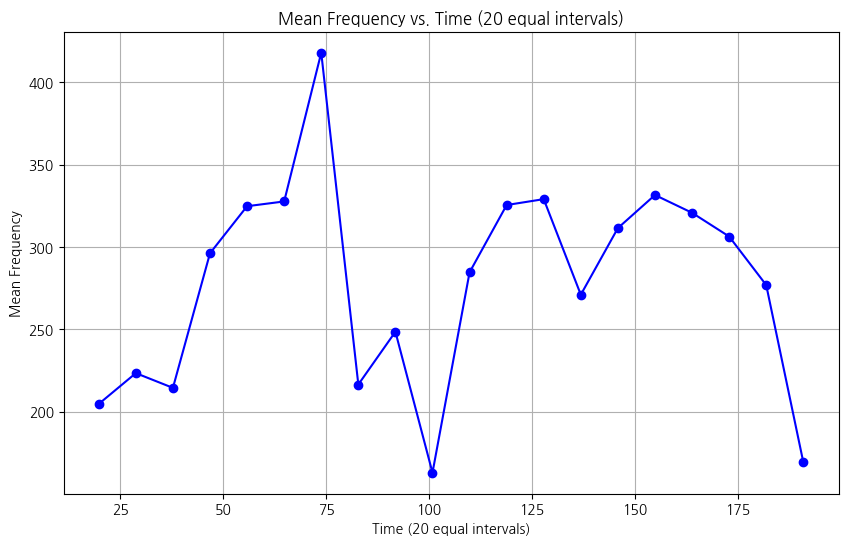

In [183]:
visual_vocal_range(data['segment'], data['frequency'])

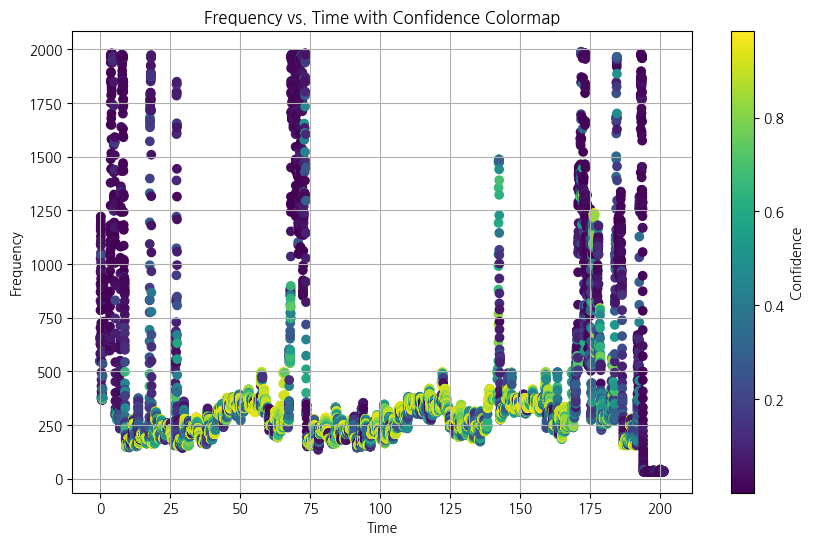

In [59]:
visual_frequency(time, frequency, confidence)

In [46]:
import librosa
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def extract_pitch_and_features(audio_path):
    # 음성을 로드합니다.
    audio, sr = librosa.load(audio_path)

    # 음성의 길이를 구합니다.
    length = len(audio) / sr

    # 15초 단위로 음성을 쪼갭니다.
    segment_duration = 15  # 15초 단위로 쪼갭니다.
    num_segments = int(np.ceil(length / segment_duration))

    # 각 시간에 대한 피치, 주파수 크기, 스펙트럴 센트로이드, 스펙트럴 대역비를 추출합니다.
    pitches = []
    frequency_magnitudes = []
    spectral_centroids = []
    spectral_contrasts = []

    for i in range(num_segments):
        start_time = i * segment_duration
        end_time = (i + 1) * segment_duration

        # 15초 세그먼트를 추출합니다.
        segment = audio[int(start_time * sr):int(end_time * sr)]

        # 피치 추출
        pitch, _ = librosa.piptrack(y=segment, sr=sr)
        pitch = pitch[pitch > 0]  # 유효한 피치 값만 남깁니다.

        # 사람의 음역대 범위 내로 제한
        min_human_pitch = librosa.note_to_hz('D0')  # 남성의 최저 음역대
        max_human_pitch = librosa.note_to_hz('F6')  # 여성의 최고 음역대
        pitch = np.clip(pitch, min_human_pitch, max_human_pitch)

        pitches.append(pitch)

        # 주파수 스펙트럼 추출
        spectrum = np.abs(librosa.stft(segment))

        # 주파수 크기 필터링 (사람의 음역대 내로 조절)
        min_human_pitch = librosa.note_to_hz('D0')  # 남성의 최저 음역대
        max_human_pitch = librosa.note_to_hz('F6')  # 여성의 최고 음역대
        filtered_spectrum = butter_bandpass_filter(spectrum, min_human_pitch, max_human_pitch, fs=sr)

        # 주파수 크기 추출 (음수 값을 0으로 설정)
        frequency_magnitude = np.maximum(filtered_spectrum, 0)
        frequency_magnitudes.append(frequency_magnitude)

        # 스펙트럴 센트로이드 추출
        spectral_centroid = librosa.feature.spectral_centroid(S=frequency_magnitude, sr=sr)
        spectral_centroids.append(spectral_centroid)

        # 스펙트럴 대역비 추출
        spectral_contrast = librosa.feature.spectral_contrast(S=frequency_magnitude, sr=sr)
        spectral_contrasts.append(spectral_contrast)

    # 각 시간에 대한 음역대를 계산합니다.
    pitch_ranges = []
    for pitch in pitches:
        if len(pitch) == 0:
            pitch_range = [0, 0]
        else:
            min_pitch = np.min(pitch)
            max_pitch = np.max(pitch)
            pitch_range = [min_pitch, max_pitch]
        pitch_ranges.append(pitch_range)

    # 결과를 데이터프레임으로 저장합니다.
    data = {
        '음역대': pitch_ranges,
        '피치': pitches,
        '주파수 크기': frequency_magnitudes,
        '스펙트럴 센트로이드': spectral_centroids,
        '스펙트럴 대역비': spectral_contrasts
    }
    df = pd.DataFrame(data)

    return df


In [47]:
# 음성의 음역대, 피치, 주파수 크기, 스펙트럴 센트로이드, 스펙트럴 대역비를 추출합니다.
vocal_feature = extract_pitch_and_features(audio_file1)

In [51]:
vocal_feature

,음역대,피치,주파수 크기,스펙트럴 센트로이드,스펙트럴 대역비
0,"[147.13173, 1396.913]","[151.012, 147.40071, 151.55559, 153.26147, 150...","[[0.0, 0.0, 1.7612128161966214e-09, 2.04806600...","[[0.0, 0.0, 4499.325614304106, 4304.0312469153...","[[20.650889225443848, 20.650889225443848, 20.6..."
1,"[145.56628, 1396.913]","[154.64046, 155.59457, 156.03876, 153.63063, 1...","[[0.0007542959423112117, 0.00689845310637154, ...","[[890.7653969428065, 922.3219133180238, 977.63...","[[8.448543203858279, 8.418644012778087, 8.3910..."
2,"[149.22061, 1396.913]","[149.22061, 153.08116, 151.05435, 152.16035, 1...","[[1.1885822240766233e-05, 0.000110248414638324...","[[5549.566454788036, 5517.5393012090835, 5466....","[[12.01320725881623, 12.173930392819198, 12.11..."
3,"[242.76486, 1396.913]","[248.4918, 244.4876, 252.30302, 248.20612, 247...","[[6.396702158359168e-05, 0.0005860593997530774...","[[2398.73815548665, 2478.5528154388235, 2588.7...","[[3.730208124373462, 3.7277676198875085, 3.729..."
4,"[150.12354, 1396.913]","[154.25172, 151.85707, 154.03116, 155.81401, 1...","[[2.3240915401945306e-06, 5.788913167156948e-0...","[[6160.781103693495, 6045.928120392071, 5904.0...","[[10.381216969693632, 8.960270810318185, 9.505..."
5,"[146.7199, 1396.913]","[150.62988, 155.81238, 154.69194, 152.91702, 1...","[[0.0006147168061306461, 0.0056707218916164205...","[[1134.180875235949, 1144.9609111218142, 1165....","[[11.232669471393947, 11.713602734063281, 12.4..."
6,"[147.51027, 1396.913]","[155.50885, 154.12482, 154.14012, 154.8562, 15...","[[6.016480333989923e-06, 9.271912022567206e-05...","[[2962.617233310297, 2950.619539540183, 2930.6...","[[18.288020804377993, 16.021191556529335, 14.5..."
7,"[162.43431, 1396.913]","[164.80396, 162.43431, 176.89468, 184.33746, 1...","[[0.00010408886804220442, 0.000958545464917979...","[[3007.7514926411222, 3071.97057846747, 3132.0...","[[4.890200891962891, 4.952885614289929, 5.0416..."
8,"[152.07608, 1396.913]","[152.07608, 159.64462, 163.77055, 165.14339, 1...","[[0.000698567384530672, 0.0064232109173205515,...","[[1320.5943180012719, 1331.8000922071649, 1341...","[[1.8141243413043426, 1.827177035267109, 1.839..."
9,"[146.93962, 1396.913]","[147.0005, 147.64804, 153.49861, 154.03986, 15...","[[1.1384119961844198e-05, 0.000104642943485071...","[[2779.6026811496477, 2876.422763525419, 3008....","[[8.695637899928485, 8.706679912192161, 8.7125..."


Text(0.5, 1.0, 'Mel Spectrogram')

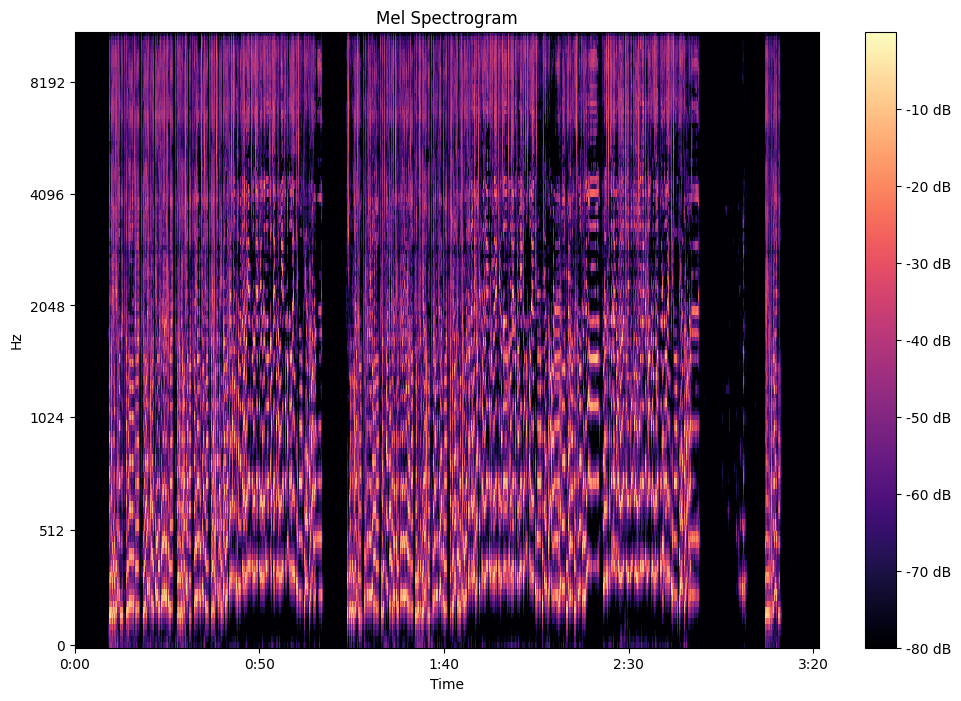

In [92]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

# 오디오 파일을 로드합니다.
y, sr = librosa.load(audio_file1)

# Mel spectrogram 계산
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Mel spectrogram을 데시벨로 변환
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Mel spectrogram 시각화
plt.figure(figsize=(12, 8))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

In [38]:
import librosa
import numpy as np

# 주파수를 옥타브와 음계로 변환하는 함수
def hz_to_octave_pitch(frequency_hz):
    # A4 음의 주파수 (440 Hz)를 기준으로 반음 수 계산
    n = 12 * np.log2(frequency_hz / 440.0)
    
    # 반올림하여 가장 가까운 음계로 변환
    pitch_class = round(n) % 12
    
    # 옥타브 계산
    octave = 4 + (n // 12)
    
    # 음계 이름으로 변환
    pitch_names = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    pitch_name = pitch_names[pitch_class]
    
    return octave, pitch_name

def extract_pitch_range(audio_path):
    # 음성을 로드합니다.
    audio, sr = librosa.load(audio_path)

    # 최소 및 최대 유효 주파수를 설정합니다.
    min_valid_frequency = 20  # 최소 주파수
    max_valid_frequency = 20000  # 최대 주파수

    # 음성을 15초 단위로 쪼개서 저장합니다.
    samples = librosa.util.frame(audio, frame_length=int(sr * 15), hop_length=int(sr * 15))

    # 각 샘플에 대해 주파수를 계산하고 음역대로 변환합니다.
    pitch_classes = []
    for sample in samples.T:
        # FFT를 통해 주파수 스펙트럼을 계산합니다.
        spectrum = np.abs(np.fft.fft(sample))
        
        # 주파수 대역 중심을 계산합니다.
        frequency_bins = np.fft.fftfreq(len(spectrum))
        center_frequency = np.sum(frequency_bins * spectrum) / np.sum(spectrum)
        
        # 주파수가 유효 범위를 벗어나면 스킵합니다.
        if center_frequency < min_valid_frequency or center_frequency > max_valid_frequency:
            print(f"Skipping invalid frequency: {center_frequency}")
            continue
        
        try:
            # 주파수를 옥타브와 음계로 변환합니다.
            octave, pitch_class = hz_to_octave_pitch(center_frequency)
            pitch_classes.append((octave, pitch_class))
        except ValueError:
            # 주파수 변환 오류 시 예외 처리
            print(f"Skipping invalid frequency: {center_frequency}")

    return pitch_classes



In [186]:
recommend

,Title_ID,Artist_ID,Genre_ID,Rating_Distribution,Low_Frequency,High_Frequency
0,4607,135,0,1.000000,131,699
1,620,135,2,0.986085,131,699
2,526,135,0,0.970944,131,699
3,660,135,0,0.963163,131,699
4,1006,135,0,0.959037,131,699
...,...,...,...,...,...,...
8207,6324,253,9,0.310989,65,523
8208,3268,253,24,0.226628,65,523
8209,5587,253,9,0.121754,65,523
8210,6337,203,1 4,0.471487,104,699


In [224]:
!python -m crepe /home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess/8/Vocals.wav

CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess/8/Vocals.wav ... (1/1)
2023-09-24 18:40:05.372134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-24 18:40:05.372160: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-24 18:40:06.593354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-24 18:40:06.593423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-09-24 18:40:06.593477: W tensorflow/stream_executor/platform/